In [1]:
import pandas as pd

from models import (
    gdpNaiveMean,
    gdpLinearRegression,
    gdpRandomForest,
    gdpXGBoost,
    gdpLSTM,
)
from utils import prepend_columns, load_data, run_gdp_model

Using TensorFlow backend.


In [2]:
gdp_data = load_data('../results/gdp.csv', 'gdp')
gov_balance_data = load_data('../results/government_balance.csv', 'gov_balance')
industry_stock_data = load_data('../results/industry_stock.csv', 'ind_stock')

X_data = gdp_data.join(gov_balance_data).join(industry_stock_data)
Y_data = gdp_data.copy()
Y_data.index -= 1
Y_data = prepend_columns(Y_data, 'next')
Y_data = Y_data.join(pd.DataFrame(index=X_data.index), how='inner')
X_data = X_data.join(pd.DataFrame(index=Y_data.index), how='inner')

Train error: 1858.30582707
Test error: 1856.77512436


/usr/local/lib/python2.7/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


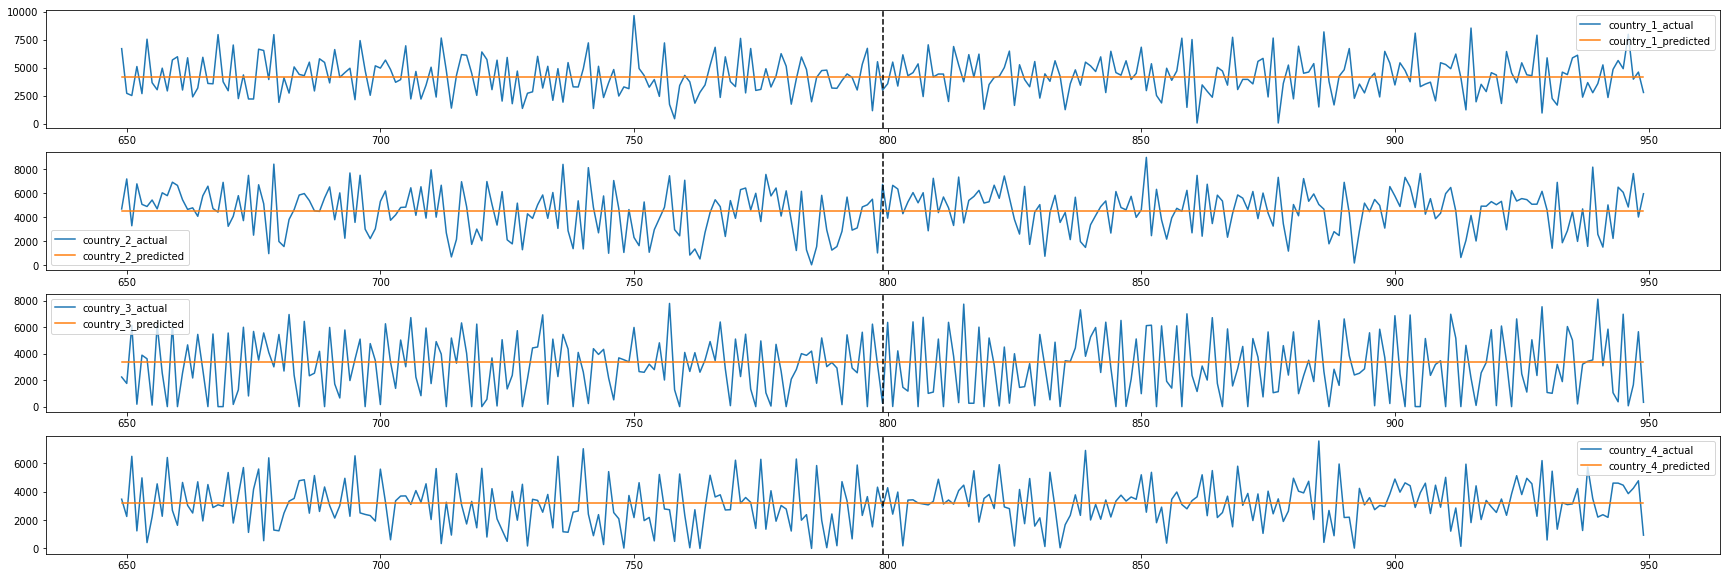

In [3]:
nm = run_gdp_model(gdpNaiveMean, X_data, Y_data)

Train error: 1093.11437438
Test error: 1147.2832114


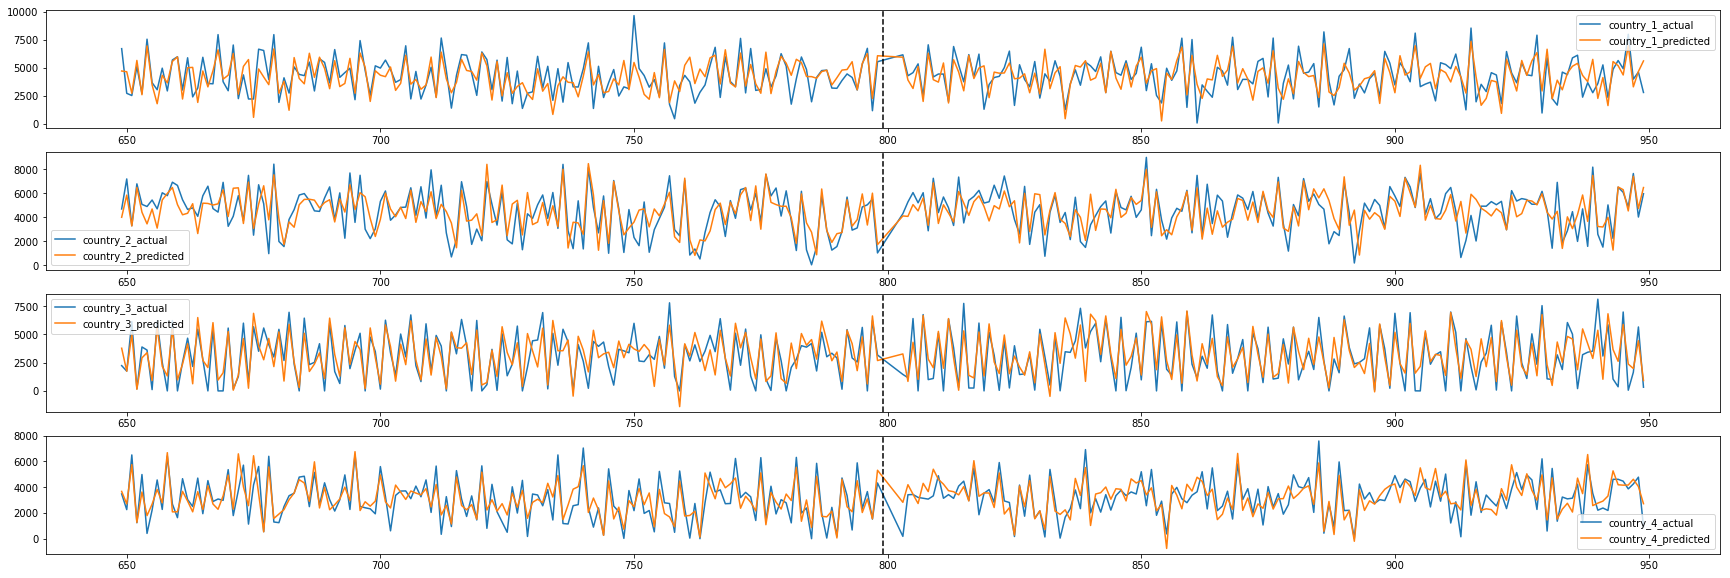

In [11]:
lr = run_gdp_model(gdpLinearRegression, X_data, Y_data, window=5)

Train error: 426.241028196
Test error: 1127.66523366


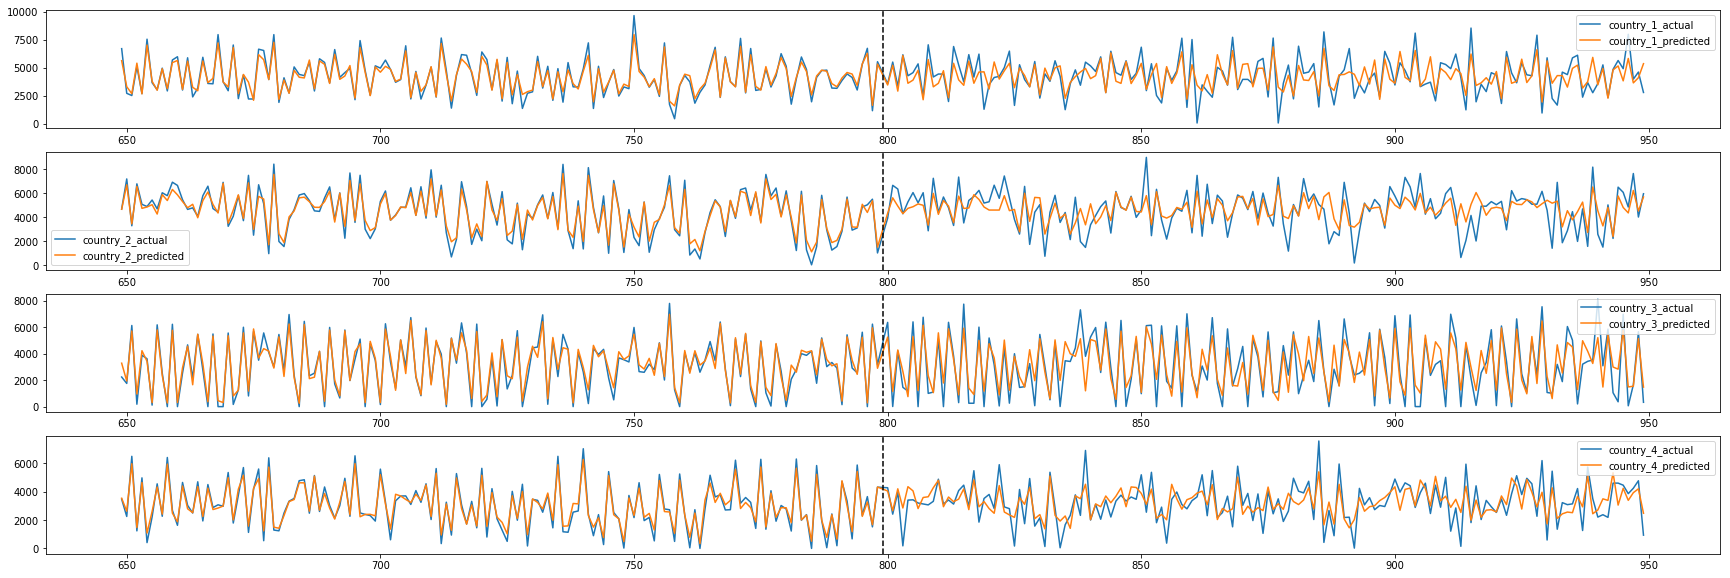

In [16]:
rf = run_gdp_model(gdpRandomForest, X_data, Y_data, window=2, max_features=0.5)

Train error: 0.00122086772673
Test error: 1058.53891336


/usr/local/lib/python2.7/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


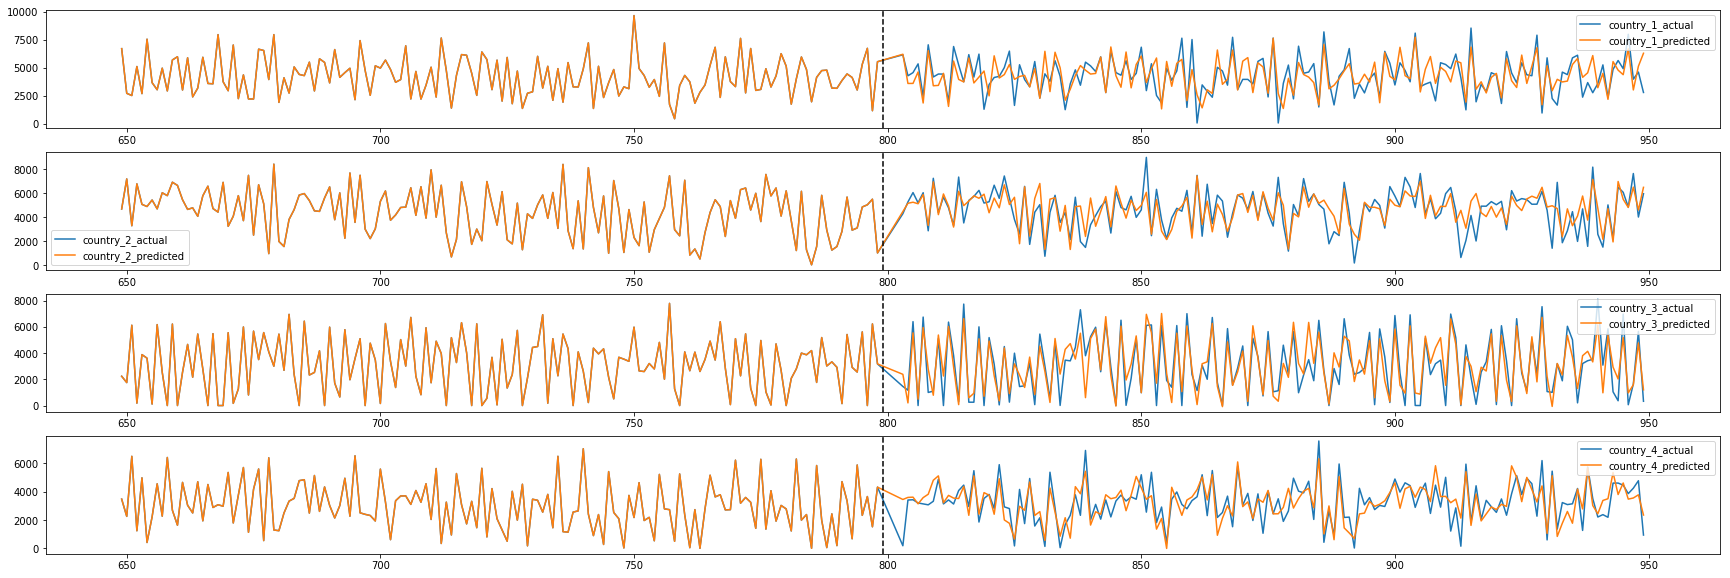

In [3]:
xgb = run_gdp_model(gdpXGBoost, X_data, Y_data, window=5, max_depth=5)

Train error: 891.663967611
Test error: 1064.5052442


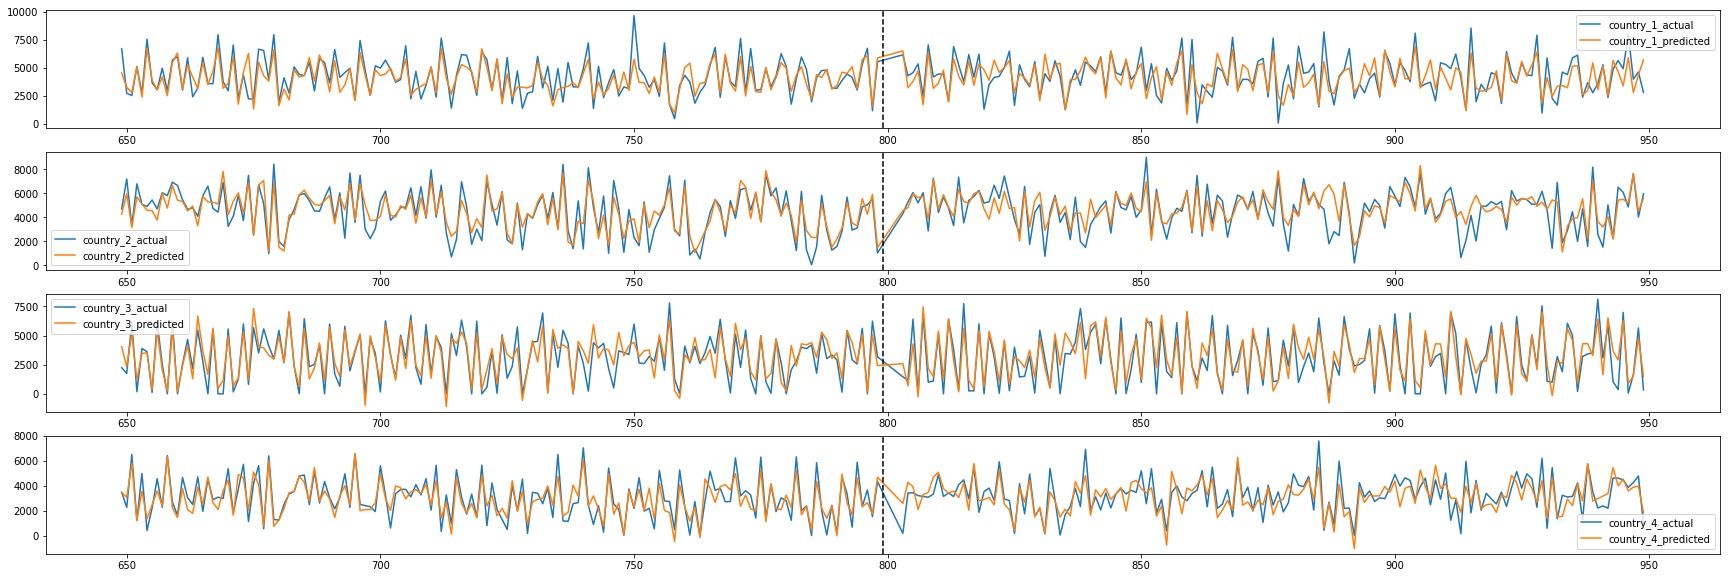

In [8]:
lstm = run_gdp_model(gdpLSTM, X_data, Y_data, window=5, epochs=500)